https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096
- brew install ffmpeg

In [1]:
# Standard libraries
from pathlib import Path

# Third-party libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

In [2]:
data_path = Path('data/')

In [3]:
trivia_cum_stats = pd.read_csv(data_path/'trivia_weekly_stats.csv', index_col='Date', parse_dates=['Date'])
trivia_cum_stats

,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
Date,,,,,,
2020-06-12,0,56.5,65.5,18,39,43
2020-06-26,122,159.5,124.5,99,142,117


In [4]:
s=trivia_cum_stats.loc['2020-06-12']

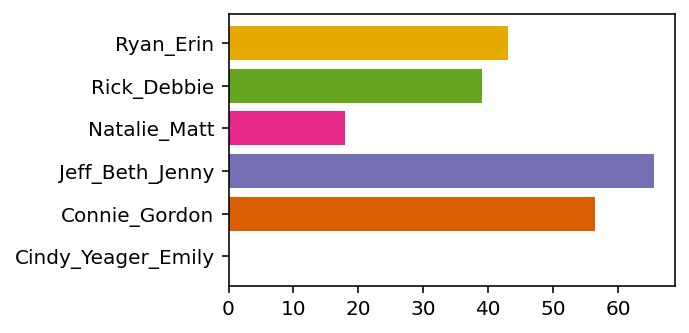

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);

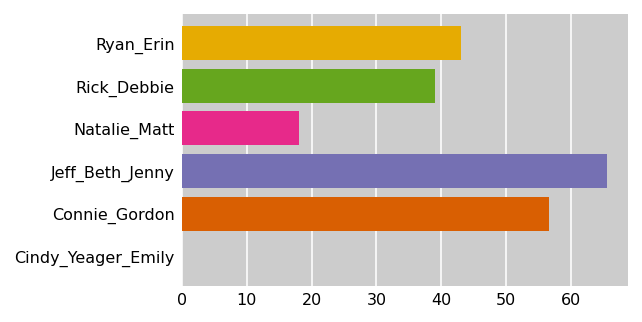

In [6]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

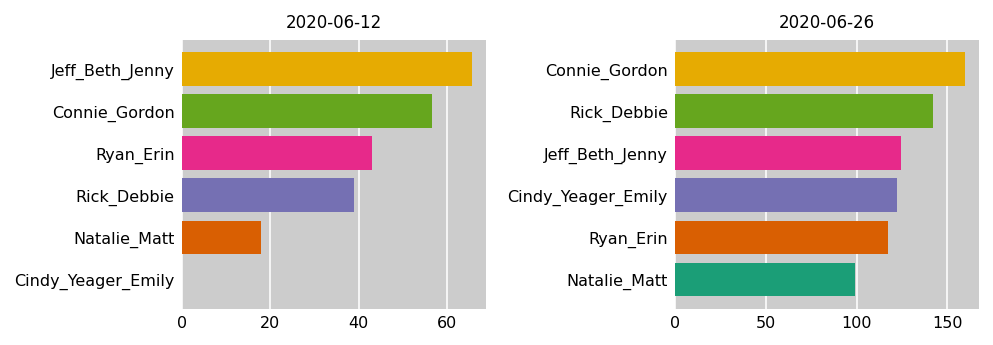

In [7]:
fig, ax_array = plt.subplots(nrows=1, ncols=2, figsize=(7, 2.5), dpi=144, tight_layout=True)
dates = ['2020-06-12', '2020-06-26']

for ax, date in zip(ax_array, dates):
    s = trivia_cum_stats.loc[date].sort_values()
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [8]:
trivia_cum_stats.rank(method='first')

,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
Date,,,,,,
2020-06-12,1.0,1.0,1.0,1.0,1.0,1.0
2020-06-26,2.0,2.0,2.0,2.0,2.0,2.0


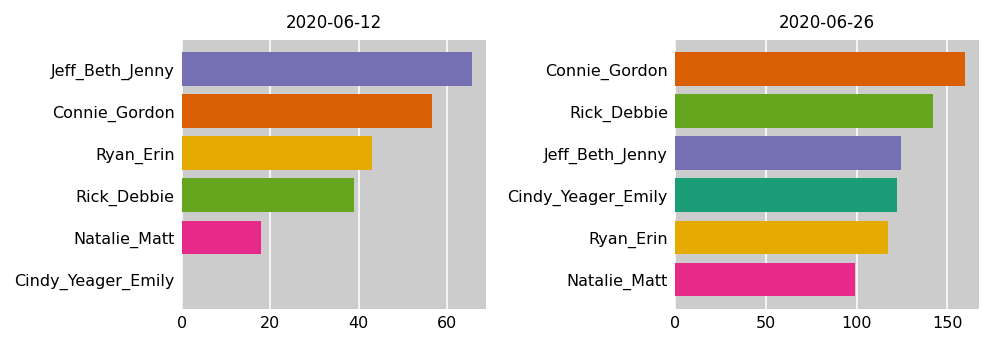

In [9]:
fig, ax_array = plt.subplots(nrows=1, ncols=2, figsize=(7, 2.5), dpi=144, tight_layout=True)
dates = ['2020-06-12', '2020-06-26']

for ax, date in zip(ax_array, dates):
    s = trivia_cum_stats.loc[date]
    y = trivia_cum_stats.loc[date].rank(method='first').values
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [10]:
df2 = trivia_cum_stats.reset_index()
df2

,Date,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
0,2020-06-12,0,56.5,65.5,18,39,43
1,2020-06-26,122,159.5,124.5,99,142,117


In [11]:
df2.index = df2.index * 5
df2

,Date,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
0,2020-06-12,0,56.5,65.5,18,39,43
5,2020-06-26,122,159.5,124.5,99,142,117


In [12]:
last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))
df_expanded

,Date,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
0,2020-06-12,0.0,56.5,65.5,18.0,39.0,43.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-06-26,122.0,159.5,124.5,99.0,142.0,117.0


In [13]:
df_expanded['Date'] = df_expanded['Date'].fillna(method='ffill')
df_expanded = df_expanded.set_index('Date')
df_expanded

,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
Date,,,,,,
2020-06-12,0.0,56.5,65.5,18.0,39.0,43.0
2020-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-26,122.0,159.5,124.5,99.0,142.0,117.0


In [14]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded

,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
Date,,,,,,
2020-06-12,1.0,5.0,6.0,2.0,3.0,4.0
2020-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-12,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-26,3.0,6.0,4.0,1.0,5.0,2.0


In [15]:
df_expanded = df_expanded.interpolate()
df_expanded

,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
Date,,,,,,
2020-06-12,0.0,56.5,65.5,18.0,39.0,43.0
2020-06-12,24.4,77.1,77.3,34.2,59.6,57.8
2020-06-12,48.8,97.7,89.1,50.4,80.2,72.6
2020-06-12,73.2,118.3,100.9,66.6,100.8,87.4
2020-06-12,97.6,138.9,112.7,82.8,121.4,102.2
2020-06-26,122.0,159.5,124.5,99.0,142.0,117.0


In [16]:
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded

,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
Date,,,,,,
2020-06-12,1.0,5.0,6.0,2.0,3.0,4.0
2020-06-12,1.4,5.2,5.6,1.8,3.4,3.6
2020-06-12,1.8,5.4,5.2,1.6,3.8,3.2
2020-06-12,2.2,5.6,4.8,1.4,4.2,2.8
2020-06-12,2.6,5.8,4.4,1.2,4.6,2.4
2020-06-26,3.0,6.0,4.0,1.0,5.0,2.0


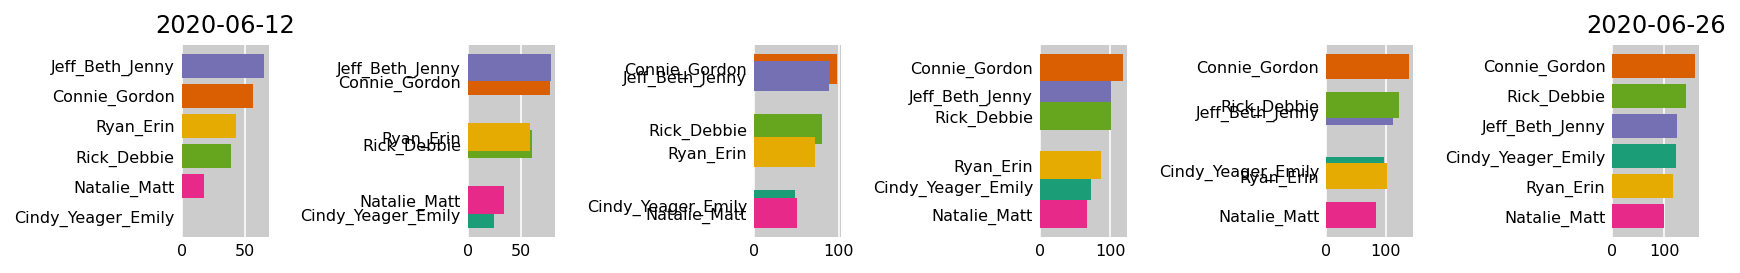

In [17]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-06-12')
ax_array[-1].set_title('2020-06-26');

In [18]:
def prepare_data(df, steps=50):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['Date'] = df_expanded['Date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('Date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(trivia_cum_stats)

In [19]:
df_expanded

,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
Date,,,,,,
2020-06-12,0.00,56.50,65.50,18.00,39.00,43.00
2020-06-12,2.44,58.56,66.68,19.62,41.06,44.48
2020-06-12,4.88,60.62,67.86,21.24,43.12,45.96
2020-06-12,7.32,62.68,69.04,22.86,45.18,47.44
2020-06-12,9.76,64.74,70.22,24.48,47.24,48.92
2020-06-12,12.20,66.80,71.40,26.10,49.30,50.40
2020-06-12,14.64,68.86,72.58,27.72,51.36,51.88
2020-06-12,17.08,70.92,73.76,29.34,53.42,53.36
2020-06-12,19.52,72.98,74.94,30.96,55.48,54.84


In [20]:
df_rank_expanded

,Cindy_Yeager_Emily,Connie_Gordon,Jeff_Beth_Jenny,Natalie_Matt,Rick_Debbie,Ryan_Erin
Date,,,,,,
2020-06-12,1.00,5.00,6.00,2.00,3.00,4.00
2020-06-12,1.04,5.02,5.96,1.98,3.04,3.96
2020-06-12,1.08,5.04,5.92,1.96,3.08,3.92
2020-06-12,1.12,5.06,5.88,1.94,3.12,3.88
2020-06-12,1.16,5.08,5.84,1.92,3.16,3.84
2020-06-12,1.20,5.10,5.80,1.90,3.20,3.80
2020-06-12,1.24,5.12,5.76,1.88,3.24,3.76
2020-06-12,1.28,5.14,5.72,1.86,3.28,3.72
2020-06-12,1.32,5.16,5.68,1.84,3.32,3.68


In [77]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels, height=0.6)
    date_str = df_expanded.index[i].strftime('%Y-%m-%d')
    ax.set_title('GameNight Trivia Cummulative Stats', fontsize='smaller')
    ax.tick_params(axis='y', labelsize=6)

    
    # Date box
    props = dict(boxstyle='round', facecolor='0.8', alpha=0.5)
    ax.text(0.75, 0.10, date_str, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


fig = plt.Figure(figsize=(7, 7), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

In [78]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)

In [62]:
anim.save(data_path/'trivia_stats_race.mp4')

# Todos
- Decrease spacing between bars
- Add data labels to outside of bars